**Importing Dataset** 


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

**Preprocessing Data**

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/Tameto/train", target_size=(256,256), batch_size=32 )

val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/Tameto/valid", target_size=(256,256), batch_size=32 )

Found 18355 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


**Visualising Data**

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5)) 
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


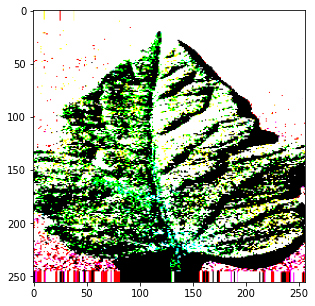

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


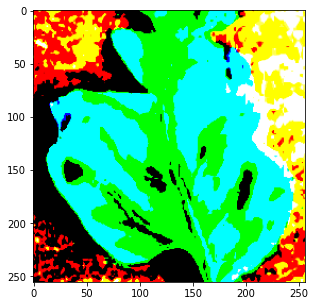

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


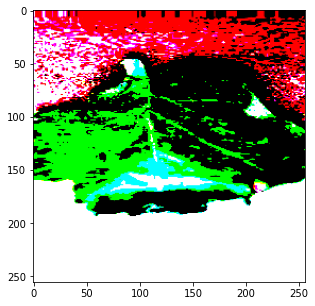

In [ ]:
plotImage(t_img[:3],label[:3])

**Model**

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256, 256,3), include_top= False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten() (base_model.output)
X = Dense (units= 10, activation='softmax')(X)

model = Model(base_model.input, X)

In [ ]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

**Early Stopping and Model Checkpoints**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta= 0.01,
                    patience= 3,
                    verbose=1 ,
                    save_best_only= True)

cb = [es,mc]

In [ ]:
his = model.fit(train ,
                steps_per_epoch= 16,
                epochs= 50,
                verbose= 1,
                callbacks= cb ,
                validation_data= val ,
                validation_steps= 16)

Epoch 1/50
16/16 [==============================] - 836s 53s/step - loss: 21.1746 - accuracy: 0.2500 - val_loss: 11.5587 - val_accuracy: 0.5508

Epoch 00001: val_accuracy improved from -inf to 0.55078, saving model to best_model.h5
Epoch 2/50
16/16 [==============================] - 832s 53s/step - loss: 11.2844 - accuracy: 0.5195 - val_loss: 9.5209 - val_accuracy: 0.6191

Epoch 00002: val_accuracy improved from 0.55078 to 0.61914, saving model to best_model.h5
Epoch 3/50
16/16 [==============================] - 827s 53s/step - loss: 7.5420 - accuracy: 0.6191 - val_loss: 6.6245 - val_accuracy: 0.6719

Epoch 00003: val_accuracy improved from 0.61914 to 0.67188, saving model to best_model.h5
Epoch 4/50
16/16 [==============================] - 828s 53s/step - loss: 6.1236 - accuracy: 0.6777 - val_loss: 5.9466 - val_accuracy: 0.7012

Epoch 00004: val_accuracy improved from 0.67188 to 0.70117, saving model to best_model.h5
Epoch 5/50
16/16 [==============================] - 826s 53s/step - 

**Graphs**

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

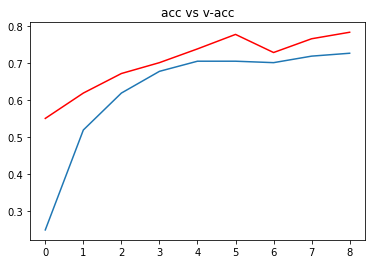

In [ ]:
plt.plot (h['accuracy'])
plt.plot (h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

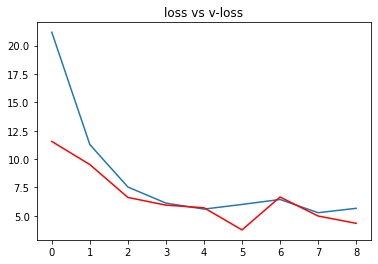

In [ ]:
plt.plot(h['loss'])
plt.plot (h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

**Importing Model and Prediction**

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
print(dict(zip( list(train.class_indices.values()) , list(train.class_indices.keys()) ) ))
ref = dict(zip( list(train.class_indices.values()) , list(train.class_indices.keys()) ) )

{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}


In [ ]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis= 0)
  pred = np.argmax(model.predict(img))
  print(f" the image belongs to { ref[pred] } ")
  #print(model.predict(img))

In [ ]:
path = "/content/test/bacterial_spot.JPG"

prediction(path)

 the image belongs to Tomato___Bacterial_spot 
